# Exploring the data
## Introverted vs. Extroverted

In [1]:
import spacy
import string
import numpy as np
import pandas as pd
from typing import List
from collections import Counter
from tqdm.notebook import tqdm


Checking out the structure of the data,
* How many words per row (using .split(' '))
* How many rows per user

In [3]:
df = pd.read_csv('../data/extrovert_introvert.csv', names=['author_id', 'post', 'extrovert'], header=0, )
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '../data/extrovert_introvert.csv'

In [4]:
# Save the dataframe with the better column names
# df.to_csv('../data/changed_columns.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40452 entries, 0 to 40451
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  40452 non-null  object
 1   post       40452 non-null  object
 2   extrovert  40452 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 948.2+ KB


Number of authors: 1992
and every row has 1500 words

In [6]:
# Checking for imbalanced dataset
df.extrovert.value_counts()

extrovert
0    31370
1     9082
Name: count, dtype: int64

In [7]:
testing = df[df['post'].str.contains('https://', case=False, na=False)]
set(testing.index)

{12715, 20059, 29577, 35532, 37062}

Check if there are authors with different labels

In [8]:
text = df.loc[0, 'post']
text

'I have a question, if you have no doctor, how\'d you get painkillers? Most OTC painkillers don\'t make you lose your feeling for using the bathroom. I agree with others, this is ER worthy. Head to the hospital. Not yet, I moved out of state almost a year ago &amp; can\'t afford insurance in my new state. I\'m going to urgent care in a couple weeks when I can afford it. Thanks I\'ll try the stool softener. I had a very terrible reaction to Miralax. With urgent care, you pay upfront, usually. Well, in my old state. Yeah, I\'m starting to think they can smell vulnerability and the potential for them to get an ego boost from your bpd traits is triggered. I call people like these types, sharks. Getting to a real doctor may take an entire month, with sliding fee scale.. but what have I got to lose? Thank you Yikes That\'s a hard thing to teach. Your eyes look hazel Hazel, I see hints of brown &amp; very light green Your eyes look just like mine. They\'re hazel green.. mostly green with brow

In [9]:
import html
html.unescape(text)

'I have a question, if you have no doctor, how\'d you get painkillers? Most OTC painkillers don\'t make you lose your feeling for using the bathroom. I agree with others, this is ER worthy. Head to the hospital. Not yet, I moved out of state almost a year ago & can\'t afford insurance in my new state. I\'m going to urgent care in a couple weeks when I can afford it. Thanks I\'ll try the stool softener. I had a very terrible reaction to Miralax. With urgent care, you pay upfront, usually. Well, in my old state. Yeah, I\'m starting to think they can smell vulnerability and the potential for them to get an ego boost from your bpd traits is triggered. I call people like these types, sharks. Getting to a real doctor may take an entire month, with sliding fee scale.. but what have I got to lose? Thank you Yikes That\'s a hard thing to teach. Your eyes look hazel Hazel, I see hints of brown & very light green Your eyes look just like mine. They\'re hazel green.. mostly green with brown around

# EDA on tokens


In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textwrap import wrap

In [11]:
df = pd.read_csv('../data/tokenized_extrovert.csv', engine='pyarrow')
df.head(10)

,author_id,label,tokens
0,t2_2hrxxs28,0,"['question', ',', 'doctor', ',', 'how', ""'d"", ..."
1,t2_2hrxxs28,0,"['butt', 'covid', '+', 'cycle', '.', 'i', ""'m""..."
2,t2_2hrxxs28,0,"['different', 'doctors', '.', 'situation', 'su..."
3,t2_4pxpgwz,0,"['thought', 'pebbleyeet', 'guy', 'autistic', '..."
4,t2_4pxpgwz,0,"['…', 'i', 'always', 'end', 'voting', 'wrong',..."
5,t2_4pxpgwz,0,"['made', 'feel', 'lot', 'better', '.', 'ooh', ..."
6,t2_4pxpgwz,0,"['mouth', ',', 'you', '’d', 'panic', 'attack',..."
7,t2_4pxpgwz,0,"['did', 'nt', 'read', 'top', 'half', 'bc', 'cr..."
8,t2_4pxpgwz,0,"['hot', '?', 'ca', 'n’t', 'much', ',', 'either..."
9,t2_4pxpgwz,0,"['otherwise', ',', 'though', ',', '“', 'needin..."


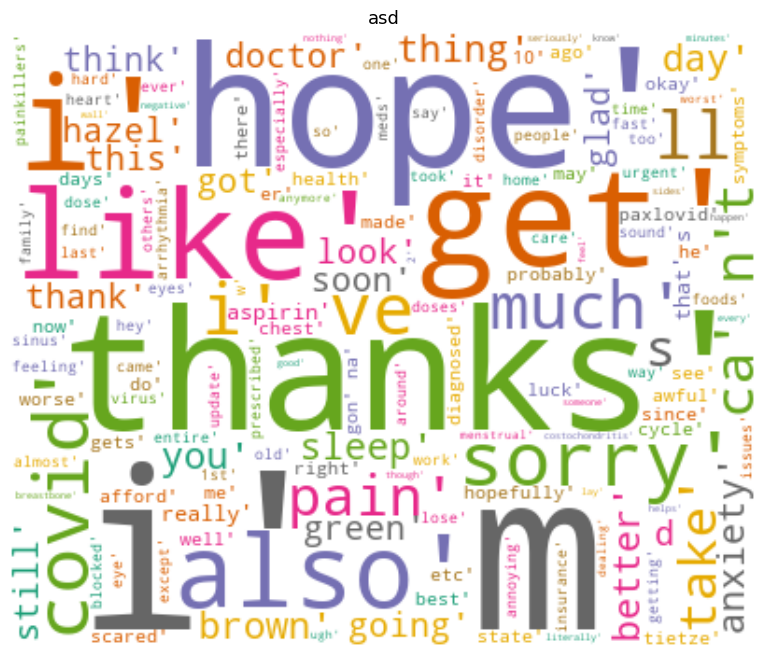

In [15]:
def plot_wordcloud(data, title):
    wc = WordCloud(
        background_color='white',
        width=400, height=330,
        max_words=150,
        colormap='Dark2'
        ).generate_from_text(data)
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear'),
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)), fontsize=13)
    plt.show()

plot_wordcloud(df.loc[0, 'tokens'], 'asd')